# Import libraries and dataset

In [301]:
import pandas as pd
import numpy as np

# Define the file path for input and output
input_file_path = "arrhythmia.data"
output_file_path = "arrhythmia.csv"

# Define the columns to import and their corresponding names
columns_to_import = {
    0: "age",
    4: "QRS_duration",
    14: "Heart_rate"
}

# Read only the specified columns from the data file into a Pandas DataFrame
df = pd.read_csv(input_file_path, header=None, usecols=list(columns_to_import.keys()))

# Rename the columns
df.rename(columns=columns_to_import, inplace=True)

# Save the DataFrame as a CSV file
df.to_csv(output_file_path, index=False)

In [302]:
# Define the path to the CSV file
csv_file_path = "arrhythmia.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Check the DataFrame's structure and the first few rows
print("\nDataFrame Info:")
print(df.info())

# Display the first few rows of the DataFrame
print("\nFirst Few Rows of DataFrame:")
print(df.head())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           452 non-null    int64 
 1   QRS_duration  452 non-null    int64 
 2   Heart_rate    452 non-null    object
dtypes: int64(2), object(1)
memory usage: 10.7+ KB
None

First Few Rows of DataFrame:
   age  QRS_duration Heart_rate
0   75            91         63
1   56            81         53
2   54           138         75
3   55           100         71
4   75            88          ?


In [303]:
# Replace '?' (missing values) with NaN for the required columns
columns_with_missing_values = ["age", "QRS_duration", "Heart_rate"]
df[columns_with_missing_values] = df[columns_with_missing_values].replace('?', pd.NA)

# Remove rows with missing values only for the required columns
df.dropna(subset=columns_with_missing_values, inplace=True)

In [304]:
# Display the first few rows of the DataFrame
print("\nFirst Few Rows of DataFrame:")
print(df.head())


First Few Rows of DataFrame:
   age  QRS_duration Heart_rate
0   75            91         63
1   56            81         53
2   54           138         75
3   55           100         71
5   13           100         84


# Visualization

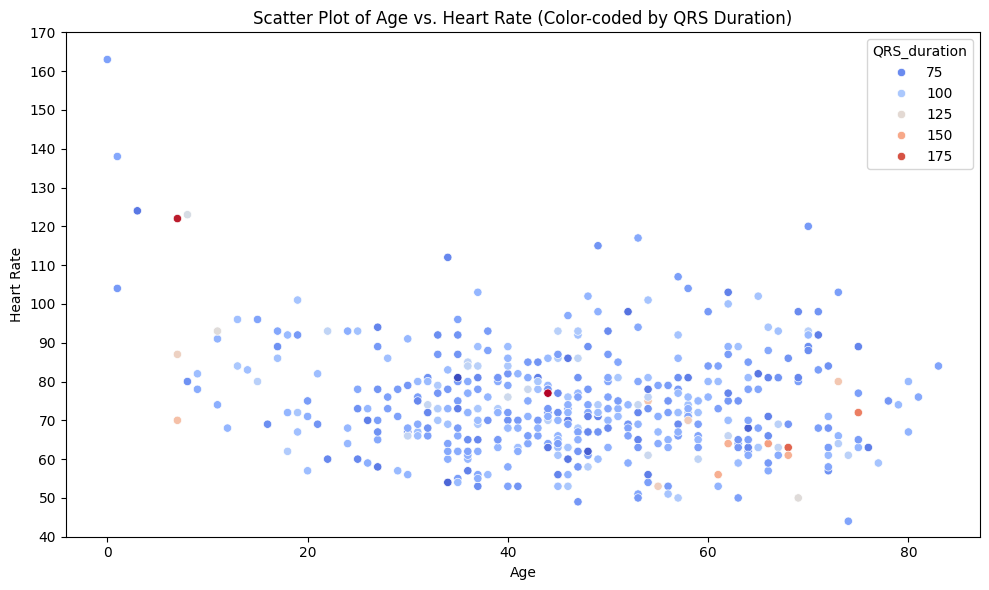

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
# Convert 'Heart_rate' to numeric type before plotting
df['Heart_rate'] = pd.to_numeric(df['Heart_rate'], errors='coerce')

sns.scatterplot(data=df, x='age', y='Heart_rate', hue='QRS_duration', palette='coolwarm')

plt.title("Scatter Plot of Age vs. Heart Rate (Color-coded by QRS Duration)")
plt.xlabel("Age")
plt.ylabel("Heart Rate")

# Find the minimum and maximum of the Heart_rate data to set the y-axis limits
min_hr = df['Heart_rate'].min()
max_hr = df['Heart_rate'].max()

# Round down and up to the nearest multiples of 10 that encompass the data range
rounded_min_hr = np.floor(min_hr / 10) * 10
rounded_max_hr = np.ceil(max_hr / 10) * 10

# Set y-axis limits using the rounded values
plt.ylim(rounded_min_hr, rounded_max_hr)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.legend(title='QRS_duration')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

plt.show()

# Normalization

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df[['age', 'Heart_rate']]  # Independent variables
y = df['QRS_duration']  # Dependent variable (target)

# Splitting the dataset into training and testing sets (since the dataset is comparetively small, I am using 70% data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the testing data with the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['age', 'Heart_rate'])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=['age', 'Heart_rate'])

# Check the first few rows of the normalized training data
print("Normalized Training Data:")
print(X_train_scaled_df.head())

# Check the first few rows of the normalized testing data
print("\nNormalized Testing Data:")
print(X_test_scaled_df.head())

Normalized Training Data:
        age  Heart_rate
0 -0.145580    0.820114
1  0.490450   -0.161004
2  1.190083    2.027645
3 -0.399992    0.065408
4  0.236038    0.895585

Normalized Testing Data:
        age  Heart_rate
0 -1.354037   -0.161004
1  1.635303   -1.368534
2  0.236038   -0.161004
3 -0.145580    0.216349
4  2.144127    0.367290


# Finding K value

In [307]:
from sklearn.cluster import KMeans

# Taking 'age', 'Heart_rate', and 'QRS_duration' as the required columns
X = df[['age', 'Heart_rate', 'QRS_duration']]

wcss = []
for i in range(1,16):  # we are testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_)

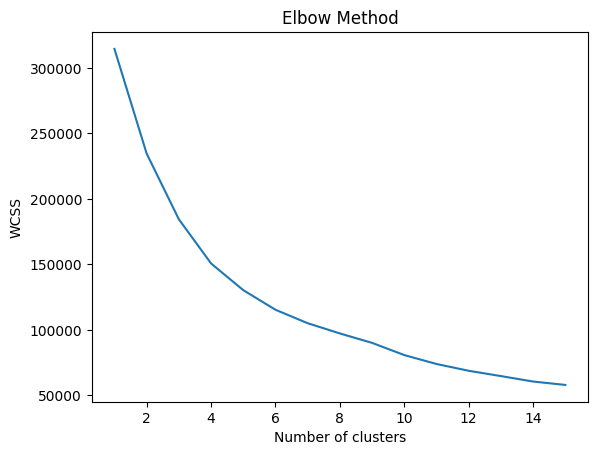

In [294]:
# plotting
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()

In [ ]:
# Explaination: In the elbow curve, the "elbow point," is the point where the rate of decrease in the Within-Cluster Sum of Squares (WCSS) starts to slow down significantly.
# It appears that the elbow point is somewhat distinct at 3 or 4 clusters. 

In [308]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'Heart_rate']], df['QRS_duration'], test_size=0.33, random_state=0)

# Normalize the training data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init=10, random_state=0)

# Clustering

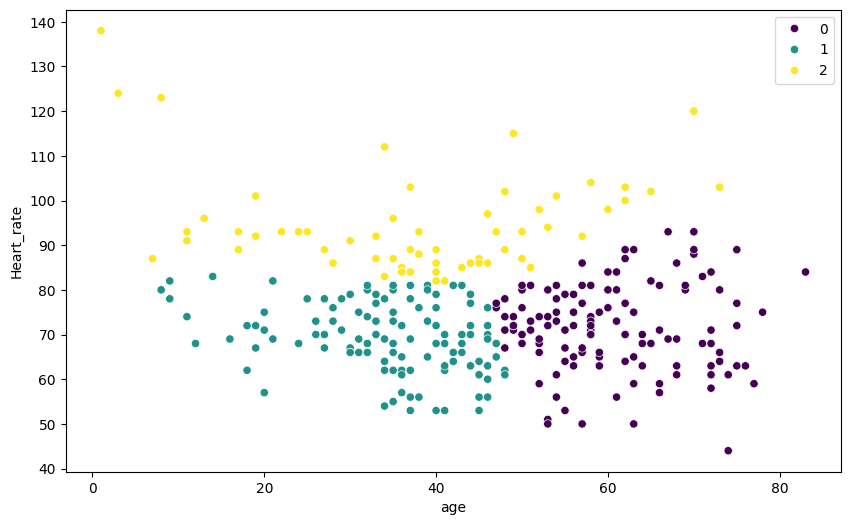

In [313]:
# Plot the clusters using the original training data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='age', y='Heart_rate', hue=kmeans.labels_, palette='viridis')

# Set y-axis major tick intervals to a number that reduces clutter, for example: 10
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

In [314]:
# Observations:
# 1. Blue Cluster (Age 0-50, HR 40-90): This group contains younger individuals with lower heart rates
# 2. Purple Cluster (Age 50-80, HR 40-90): These are older individuals, also with lower heart rates
# 3. Yellow Cluster (Distributed Across All Ages, HR 80-140): This cluster encompasses a wide age range and higher heart rates. 
# Potential Outliers exist. Only 3 variable are taken into considertaion for the plot.  All othe relevant variables are not considered.  